3번

유전 알고리즘
- 선택 : 현 세대에서 다음 세대로 전해지는 해의 후보가 되는 해들을 선택 (fitness score 높은 값)
- 교차 : 세대 내에서 교배를 통해 다음 세대 생성
- 변이 : 주어진 해의 유전자 내의 유전 인자의 순서 혹은 값이 임의로 변경되어 다른 해로 변형
- 대치 : 교차, 변이 등을 거쳐서 만들어진 새로운 해를 해집단에 추가하고, 기존 해 중 열등한 해를 가려내서 제외

In [ ]:
# 3-1, 3-2
import numpy as np
import pandas as pd
import random

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def zeta(w, b, x):
    return np.dot(x, w) + b

def fitness(x, t, w, b):
    y = sigmoid(zeta(w, b, x))
    #loss = ((t-y)*(t-y)).mean()
    loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
    # loss == fitness score
    return loss

def selection(population, x, t):
    fitness_list = [fitness(x, t, w, b) for w, b in population]
    for i in range(len(fitness_list)):
      print(i, ' : ', fitness_list[i])
    sorted_indices = np.argsort(fitness_list)
    selected_indices = sorted_indices[:4]
    selected_population = [population[idx] for idx in selected_indices]
    return selected_population


# Load data
data = pd.read_csv("p1_training_data.csv")
x = data.iloc[:, :3].values
t = data.iloc[:, 3].values

# Set random seed
random.seed(10)
np.random.seed(10)

# Initialize population
population_size = 100
population = [(np.random.uniform(-1, 1, 3), np.random.uniform(0, 100)) for _ in range(population_size)]

print('--------------- 1 Generation ------------')

for i in range(len(population)):
  print(i, ' : ', population[i])
selected_population = selection(population, x, t)
print(selected_population)
'''
(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499) -> 45  :  5.896115093525851
(array([ 0.20190841,  0.29045549, -0.88674359]), 29.74840969759218) -> 74  :  12.911658792673755
(array([-0.29868722,  0.12638137, -0.40054026]), 51.233415327354926) -> 27  :  14.748943417414946
(array([-0.17339069,  0.07093743, -0.31471375]), 12.95767771432601) -> 86  :  20.046400566817805
'''

--------------- 1 Generation ------------
0  :  (array([ 0.54264129, -0.9584961 ,  0.26729647]), 74.88038825386118)
1  :  (array([-0.00298598, -0.55040671, -0.60387427]), 76.05307121989587)
2  :  (array([-0.66177833, -0.82332037,  0.37071964]), 95.33933461949366)
3  :  (array([-0.99210347,  0.02438453,  0.62524192]), 61.25260668293882)
4  :  (array([ 0.44351063, -0.41624786,  0.83554825]), 71.45757833976906)
5  :  (array([ 0.08508874, -0.7156599 , -0.25331848]), 67.41336150663453)
6  :  (array([-0.11633365, -0.13197201,  0.23553396]), 51.31382425543909)
7  :  (array([0.30079436, 0.20207791, 0.61044639]), 52.16471523936341)
8  :  (array([ 0.81729776, -0.36152782, -0.8190813 ]), 30.070005663620336)
9  :  (array([-0.77203128,  0.65736265, -0.90620736]), 62.628714831139256)
10  :  (array([ 0.09517231,  0.63857399, -0.60210492]), 85.68503024577332)
11  :  (array([-0.29669472,  0.50929538, -0.40807659]), 88.39364795611863)
12  :  (array([-0.34897672, -0.6699682 , -0.21494151]), 9.34603745586

<ipython-input-57-f2566a064506>:15: RuntimeWarning: divide by zero encountered in log
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
<ipython-input-57-f2566a064506>:15: RuntimeWarning: invalid value encountered in multiply
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss


'\n[(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499), \n(array([ 0.20190841,  0.29045549, -0.88674359]), 29.74840969759218), \n(array([-0.29868722,  0.12638137, -0.40054026]), 51.233415327354926), \n(array([-0.17339069,  0.07093743, -0.31471375]), 12.95767771432601)]\n'

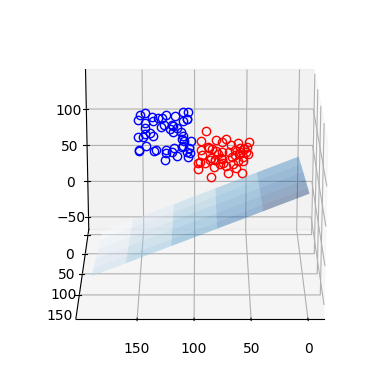

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random

data = pd.read_csv("p1_training_data.csv") # 데이터 읽기
np_data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
## positive samples
x_1 = np_data[0:50,0]
y_1 = np_data[0:50,1]
z_1 = np_data[0:50,2]
## negative samples
x_0 = np_data[50:,0]
y_0 = np_data[50:,1]
z_0 = np_data[50:,2]

## Generation 1의 fittest gene 
idx = 3
w1 = selected_population[idx][0][0]
w2 = selected_population[idx][0][1]
w3 = selected_population[idx][0][2]
b = selected_population[idx][1]

ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력
ax.plot(x_0, y_0, z_0, linestyle="none", marker="o", mfc="none", markeredgecolor="r") #샘플 출력
X = np.arange(0, 2, 0.1)*100
Y = np.arange(0, 2, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (-float(w1)/w3 * X) + (-float(w2)/w3 * Y) - float(b)/w3 # 평면의 방정식
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력 
ax.view_init(elev=20, azim=90) # elev은 고도(높이) 각도, azim은 방위(좌우) 각도
plt.show()
  

In [ ]:
# 3-3
import numpy as np
import pandas as pd
import random

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def zeta(w, b, x):
    return np.dot(x, w) + b

def fitness(x, t, w, b):
    y = sigmoid(zeta(w, b, x))
    # loss = ((t-y)*(t-y)).mean()
    loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
    return loss

def selection(population, x, t):
    fitness_list = [fitness(x, t, w, b) for w, b in population]
    sorted_indices = np.argsort(fitness_list)
    selected_indices = sorted_indices[:20]
    
    for i in selected_indices:
      print('fitness&loss : ', fitness_list[i])

    selected_population = [population[idx] for idx in selected_indices]
    return selected_population

def crossover(parents):
    num_parents = len(parents)
    num_children = population_size - 4 # 이전 세대의 population 수에 맞게 자식들 개수 생성
    children = []
    for _ in range(num_children):
        # Select random pairs of parents for crossover
        parent_indices = random.sample(range(num_parents), 2)
        parent1, parent2 = parents[parent_indices[0]], parents[parent_indices[1]]
        
        child_w = (parent1[0] + parent2[0]) / 2
        child_b = (parent1[1] + parent2[1]) / 2
        children.append((child_w, child_b))
    return children


def mutate(children, mutation_rate):
    mutated_children = []
    for w, b in children:
        if random.random() <= mutation_rate:
            w = np.random.uniform(-1, 1, 3)
            b = np.random.uniform(-100, 100)
        mutated_children.append((w, b))
    return mutated_children

# Load data
data = pd.read_csv("p1_training_data.csv")
x = data.iloc[:, :3].values
t = data.iloc[:, 3].values

# Set random seed
random.seed(10)
np.random.seed(10)

# Initialize population
population_size = 100
population = [(np.random.uniform(-1, 1, 3), np.random.uniform(0, 100)) for _ in range(population_size)]

mutation_rate = 0.1
_2and3 = []

for generation in range(3):
    print('---------------', generation+1, ' Generation ------------')

    # Selection
    selected_population = selection(population, x, t)
    print(selected_population) # 현재 세대의 상위 유전자 4개 출력
    _2and3.append(selected_population)

    # Crossover
    children = crossover(selected_population)
    
    # Mutation
    mutated_children = mutate(children, mutation_rate)
    
    # New population
    population = selected_population + mutated_children
    
    # 상위 유전자 4개 중 가장 높은 fitness score을 가진 유전자의 score 출력
    best_fitness = min([fitness(x, t, w, b) for w, b in population])
    print('Fitness score:', best_fitness)

--------------- 1  Generation ------------
fitness&loss :  5.896115093525851
fitness&loss :  12.911658792673755
fitness&loss :  14.748943417414946
fitness&loss :  20.046400566817805
fitness&loss :  22.707759665543435
fitness&loss :  23.59857640723575
fitness&loss :  23.65911966607278
fitness&loss :  24.46893203546003
fitness&loss :  24.92993258800089
fitness&loss :  27.398452257553245
fitness&loss :  27.781385267369004
fitness&loss :  30.31165593021951
fitness&loss :  32.558922281836765
fitness&loss :  34.56337239446757
fitness&loss :  35.000058382388595
fitness&loss :  35.36571212196013
fitness&loss :  36.41531335486711
fitness&loss :  36.90441828398592
fitness&loss :  37.52569414791188
fitness&loss :  43.16449218046407
[(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499), (array([ 0.20190841,  0.29045549, -0.88674359]), 29.74840969759218), (array([-0.29868722,  0.12638137, -0.40054026]), 51.233415327354926), (array([-0.17339069,  0.07093743, -0.31471375]), 12.957677714

<ipython-input-109-019ace44b874>:15: RuntimeWarning: divide by zero encountered in log
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
<ipython-input-109-019ace44b874>:15: RuntimeWarning: invalid value encountered in multiply
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss


In [ ]:
print(_2and3)

[[(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499), (array([ 0.20190841,  0.29045549, -0.88674359]), 29.74840969759218), (array([-0.29868722,  0.12638137, -0.40054026]), 51.233415327354926), (array([-0.17339069,  0.07093743, -0.31471375]), 12.95767771432601)], [(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499), (array([ 0.0849751 ,  0.48961354, -0.7685579 ]), 15.605948603958584), (array([ 0.0849751 ,  0.48961354, -0.7685579 ]), 15.605948603958584), (array([ 0.0849751 ,  0.48961354, -0.7685579 ]), 15.605948603958584)], [(array([-0.03195822,  0.68877159, -0.65037221]), 1.46348751032499), (array([ 0.02650844,  0.58919256, -0.70946506]), 8.534718057141788), (array([ 0.02650844,  0.58919256, -0.70946506]), 8.534718057141788), (array([ 0.02650844,  0.58919256, -0.70946506]), 8.534718057141788)]]


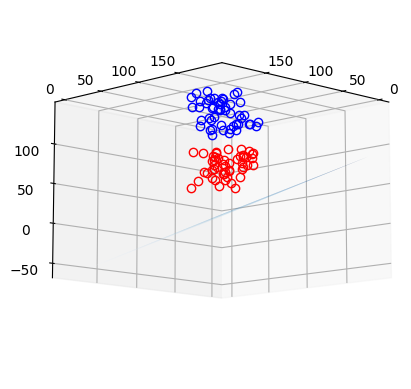

In [ ]:
# 3-4 (2세대)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random

data = pd.read_csv("p1_training_data.csv") # 데이터 읽기
np_data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
## positive samples
x_1 = np_data[0:50,0]
y_1 = np_data[0:50,1]
z_1 = np_data[0:50,2]
## negative samples
x_0 = np_data[50:,0]
y_0 = np_data[50:,1]
z_0 = np_data[50:,2]

## Generation 1의 fittest gene 
idx = 3
w1 = _2and3[0][idx][0][0]
w2 = _2and3[0][idx][0][1]
w3 = _2and3[0][idx][0][2]
b = _2and3[0][idx][1]

ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력
ax.plot(x_0, y_0, z_0, linestyle="none", marker="o", mfc="none", markeredgecolor="r") #샘플 출력
X = np.arange(0, 2, 0.1)*100
Y = np.arange(0, 2, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (-float(w1)/w3 * X) + (-float(w2)/w3 * Y) - float(b)/w3 # 평면의 방정식
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력 
ax.view_init(elev=-10, azim=45) # elev은 고도(높이) 각도, azim은 방위(좌우) 각도
plt.show()

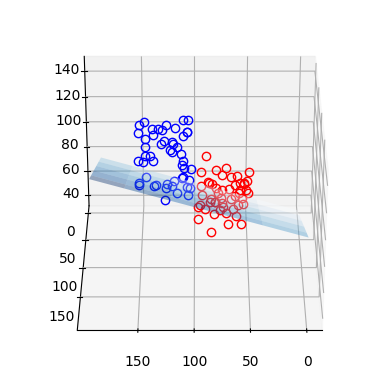

In [ ]:
# 3-4 (3세대)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random

data = pd.read_csv("p1_training_data.csv") # 데이터 읽기
np_data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
## positive samples
x_1 = np_data[0:50,0]
y_1 = np_data[0:50,1]
z_1 = np_data[0:50,2]
## negative samples
x_0 = np_data[50:,0]
y_0 = np_data[50:,1]
z_0 = np_data[50:,2]

## Generation 1의 fittest gene 
idx = 5
w1 = _2and3[1][idx][0][0]
w2 = _2and3[1][idx][0][1]
w3 = _2and3[1][idx][0][2]
b = _2and3[1][idx][1]

ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력
ax.plot(x_0, y_0, z_0, linestyle="none", marker="o", mfc="none", markeredgecolor="r") #샘플 출력
X = np.arange(0, 2, 0.1)*100
Y = np.arange(0, 2, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (-float(w1)/w3 * X) + (-float(w2)/w3 * Y) - float(b)/w3 # 평면의 방정식
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력 
ax.view_init(elev=30, azim=90) # elev은 고도(높이) 각도, azim은 방위(좌우) 각도
plt.show()

In [11]:
# 3-5
import numpy as np
import pandas as pd
import random

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def zeta(w, b, x):
    return np.dot(x, w) + b

def fitness(x, t, w, b):
    y = sigmoid(zeta(w, b, x))
    # loss = ((t-y)*(t-y)).mean()
    loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
    return loss

def selection(population, x, t):
    fitness_list = [fitness(x, t, w, b) for w, b in population]
    sorted_indices = np.argsort(fitness_list) # fitness_list를 오름차순으로 정렬하고 이의 인덱스를 반환
    
    # selected_indices = sorted_indices[:10]
    lens = 10 # 상위 유전자 (loss 값 작은) 10개
    selected_indices = []
    selected_fitness = []

    # 중복값(fitness score) 제거
    for i in sorted_indices:
      if lens == len(selected_indices):
        break
      if fitness_list[i] not in selected_fitness:
        selected_fitness.append(fitness_list[i])
        selected_indices.append(i)

    '''for i in selected_indices:
      print('fitness&loss : ', fitness_list[i])'''

    # 상위 유전자 10개 population
    selected_population = [population[idx] for idx in selected_indices]
    return selected_population

def crossover(parents):
    num_parents = len(parents)
    num_children = population_size # 이전 세대의 population 수에 맞게 자식들 개수 생성
    children = []
    for _ in range(num_children):
        # 랜덤으로 부모 2명 선택
        parent_indices = random.sample(range(num_parents), 2)
        parent1, parent2 = parents[parent_indices[0]], parents[parent_indices[1]]
        
        # 자식 파라미터 생성
        child_w = (parent1[0] + parent2[0]) / 2
        child_b = (parent1[1] + parent2[1]) / 2
        children.append((child_w, child_b))
    return children


def mutate(children, mutation_rate):
    mutated_children = []
    for w, b in children:
        # 랜덤값이 돌연변이 비율 보다 작으면 돌연변이 생성 (자식 파라미터 랜덤값으로 변경)
        if random.random() <= mutation_rate:
            w = np.random.uniform(-1, 1, 3)
            b = np.random.uniform(-100, 100)
        mutated_children.append((w, b))
    return mutated_children

# Load data
data = pd.read_csv("p1_training_data.csv")
x = data.iloc[:, :3].values
t = data.iloc[:, 3].values

# Set random seed
random.seed(10)
np.random.seed(10)

# Initialize population
population_size = 100
population = [(np.random.uniform(-1, 1, 3), np.random.uniform(0, 100)) for _ in range(population_size)]

# Genetic algorithm
mutation_rate = 0.1 # 돌연변이 비율
num_generations = 1000 # 세대 수

for generation in range(num_generations):
    print('---------------', generation+1, ' Generation ------------')

    # Selection
    selected_population = selection(population, x, t)

    # Crossover
    children = crossover(selected_population)
    
    # Mutation
    mutated_children = mutate(children, mutation_rate)
    
    # New population
    population = selected_population + mutated_children
    
    # 가장 높은 fitness score을 가진 유전자의 score 출력
    best_fitness = min([fitness(x, t, w, b) for w, b in population])
    print('Best Fitness Score:', best_fitness)

    # fitness score가 0.000073 보다 작으면 그만 생성
    if best_fitness < 0.000073:
      print('Weight : ', population[0][0][0], population[0][0][1], population[0][0][2])
      print('Bias : ', population[0][1])
      break

--------------- 1  Generation ------------
Best Fitness Score: 5.896115093525851
--------------- 2  Generation ------------
Best Fitness Score: 5.896115093525851
--------------- 3  Generation ------------
Best Fitness Score: 4.922996077955291
--------------- 4  Generation ------------
Best Fitness Score: 1.356228537418207
--------------- 5  Generation ------------
Best Fitness Score: 1.356228537418207
--------------- 6  Generation ------------
Best Fitness Score: 1.356228537418207
--------------- 7  Generation ------------
Best Fitness Score: 1.3558731447728187
--------------- 8  Generation ------------
Best Fitness Score: 1.3549405652599982
--------------- 9  Generation ------------
Best Fitness Score: 1.3549405652599982
--------------- 10  Generation ------------
Best Fitness Score: 1.3549405652599982
--------------- 11  Generation ------------
Best Fitness Score: 1.3549405652599975
--------------- 12  Generation ------------
Best Fitness Score: 1.3549372652921252
--------------- 13 

<ipython-input-11-a31324aa1f28>:15: RuntimeWarning: divide by zero encountered in log
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss
<ipython-input-11-a31324aa1f28>:15: RuntimeWarning: invalid value encountered in multiply
  loss = -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()  # Binary Cross Entropy (BCE) loss


 15  Generation ------------
Best Fitness Score: 1.3549372057563018
--------------- 16  Generation ------------
Best Fitness Score: 1.3549372057563018
--------------- 17  Generation ------------
Best Fitness Score: 1.3549372057563018
--------------- 18  Generation ------------
Best Fitness Score: 1.3549372057563018
--------------- 19  Generation ------------
Best Fitness Score: 1.3549372055373845
--------------- 20  Generation ------------
Best Fitness Score: 1.3549372055373845
--------------- 21  Generation ------------
Best Fitness Score: 1.3549372055373845
--------------- 22  Generation ------------
Best Fitness Score: 1.3549372055360143
--------------- 23  Generation ------------
Best Fitness Score: 1.3549372055356728
--------------- 24  Generation ------------
Best Fitness Score: 1.3549372055355873
--------------- 25  Generation ------------
Best Fitness Score: 1.3549372055355646
--------------- 26  Generation ------------
Best Fitness Score: 1.354937205535558
--------------- 27  

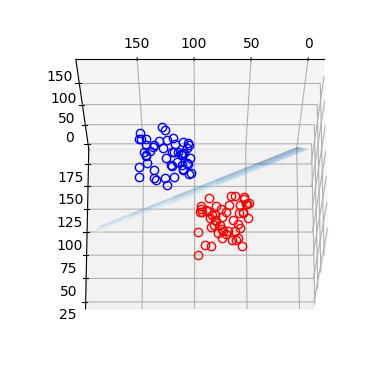

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random

data = pd.read_csv("p1_training_data.csv") # 데이터 읽기
np_data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
## positive samples
x_1 = np_data[0:50,0]
y_1 = np_data[0:50,1]
z_1 = np_data[0:50,2]
## negative samples
x_0 = np_data[50:,0]
y_0 = np_data[50:,1]
z_0 = np_data[50:,2]

## Generation 1의 fittest gene 
idx = 7
w1 = population[0][0][0]
w2 = population[0][0][1]
w3 = population[0][0][2]
b = population[0][1]

ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력
ax.plot(x_0, y_0, z_0, linestyle="none", marker="o", mfc="none", markeredgecolor="r") #샘플 출력
X = np.arange(0, 2, 0.1)*100
Y = np.arange(0, 2, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (-float(w1)/w3 * X) + (-float(w2)/w3 * Y) - float(b)/w3 # 평면의 방정식
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력 

# 그래프를 특정 각도로 볼 수 있도록 설정
ax.view_init(elev=-20, azim=90) # elev은 고도(높이) 각도, azim은 방위(좌우) 각도

plt.show()